In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tkinter as tk
from tkinter import ttk, Frame, Label, PhotoImage
import smartsheet
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter.ttk import Treeview
from matplotlib.figure import Figure
from tkinter import PanedWindow

In [ ]:
#Reading the excel
df1 = pd.read_excel(r"C:\Users\PaoloFernandez\Desktop\ListofServiceRequests__EN (1).xlsx")
df = pd.read_excel(r"C:\Users\PaoloFernandez\Desktop\XLS_COD_TIMEENTRIES_LIST_IN_EN (1).xlsx")
# Replace invalid dates with NaT
df.loc[~pd.to_datetime(df['Date'], errors='coerce').notnull(), 'Date'] = pd.NaT

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])

#Leaving only the necessary columns
df = df[['Date','Start Time', 'End Time', 'Ticket_ID', 'Employee Name']]

# Rename columns
df.rename(columns={'Start Time': 'Start_Time', 'End Time': 'End_Time', 'Employee Name': 'Employee_Name'}, inplace=True)

#Ticket_ID to int
df['Ticket_ID'] = df['Ticket_ID'].fillna(0).astype(int)

#Leaving only Priority, ID, Type, Site ID, Product Description, Status, Ticket Owner, Issue Type, Issue Source and Reported On in df1
df1 = df1[['Priority', 'Ticket_ID', 'Type', 'Site ID', 'Product Description', 'Status', 'Ticket Owner', 'Issue Type', 'Issue Sources', 'Reported On']]

#ID to int
df1['Ticket_ID'] = df1['Ticket_ID'].astype(int)

#Rename columns
df1.rename(columns={'Site ID': 'Site_ID', 'Product Description': 'Product_Description', 'Ticket Owner': 'Ticket_Owner', 'Issue Type': 'Issue_Type', 'Issue Sources': 'Issue_Sources', 'Reported On': 'Reported_On'}, inplace=True)

# Merge df and df1 on the 'ID' column
df2 = df.merge(df1, on='Ticket_ID', how='inner')

#End_Time column to string, replace 00:00:00 with 23:59:59
df2['End_Time'] = df2['End_Time'].astype(str)
df2['End_Time'] = df2['End_Time'].str.replace('00:00:00', '23:59:59')
#Start_Time column to string
df2['Start_Time'] = df2['Start_Time'].astype(str)
#Convertinf Start Time and End Time to datetime, skip lines with errors, selecting only time
df2['Start_Time'] = pd.to_datetime(df2['Start_Time'], errors='coerce').dt.time
df2['End_Time'] = pd.to_datetime(df2['End_Time'], errors='coerce').dt.time
# Convert 'Start Time' and 'End Time' to timedelta, only time
df2['Start_Time'] = pd.to_timedelta(df2['Start_Time'].astype(str))
df2['End_Time'] = pd.to_timedelta(df2['End_Time'].astype(str))

# Calculate the duration, only time
df2['Duration'] = df2['End_Time'] - df2['Start_Time']

# Convert duration to string format without days part
df2['Duration'] = df2['Duration'].apply(lambda x: str(x).split()[-1])

# Round duration to 2 seconds
df2['Duration'] = df2['Duration'].astype('timedelta64[s]').round('2s').astype(str)

# Convert 'Ticket_ID' to int
df2['Ticket_ID'] = df2['Ticket_ID'].fillna(0).astype(int)
#Convert Start_Time and End_Time to string
df2['Start_Time'] = df2['Start_Time'].astype(str)
df2['End_Time'] = df2['End_Time'].astype(str)
#Replace '0 days' with '' in Duration column
df2["Start_Time"] = pd.to_datetime(df2["Start_Time"].str.split().str[-1])
df2["End_Time"] = pd.to_datetime(df2["End_Time"].str.split().str[-1])





Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\PaoloFernandez\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\PaoloFernandez\AppData\Local\Temp\ipykernel_448\4276028594.py", line 263, in show_costa_rica_graph
    self.forget_costa_rica_button = ttk.Button(self.costa_rica_frame, text='Back to America', command=self.forget_costa_rica_graph)
                                               ^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'AmericaFrame' object has no attribute 'costa_rica_frame'


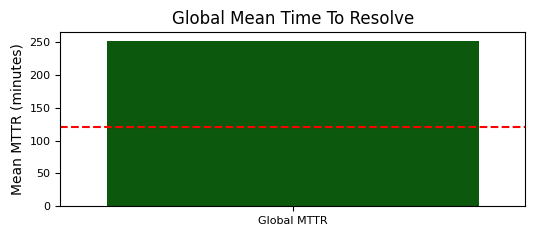

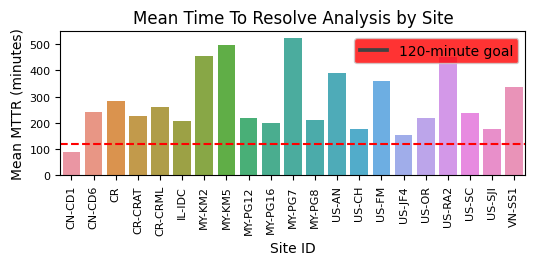

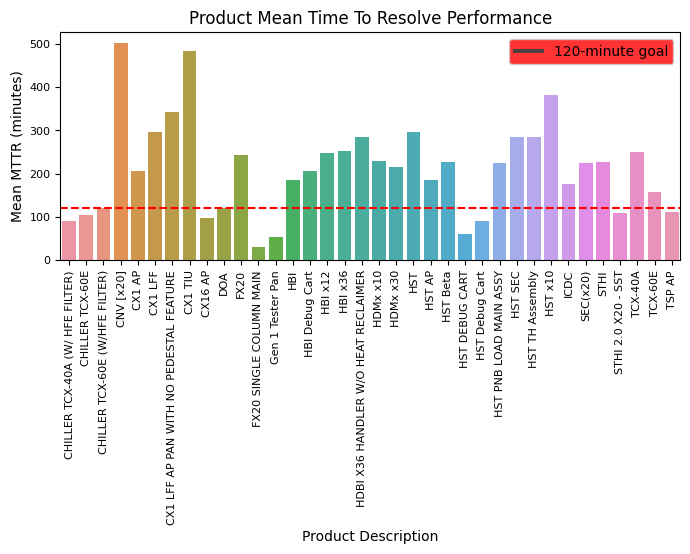

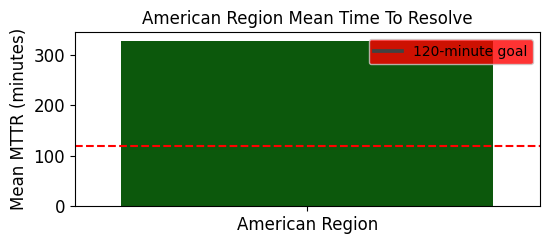

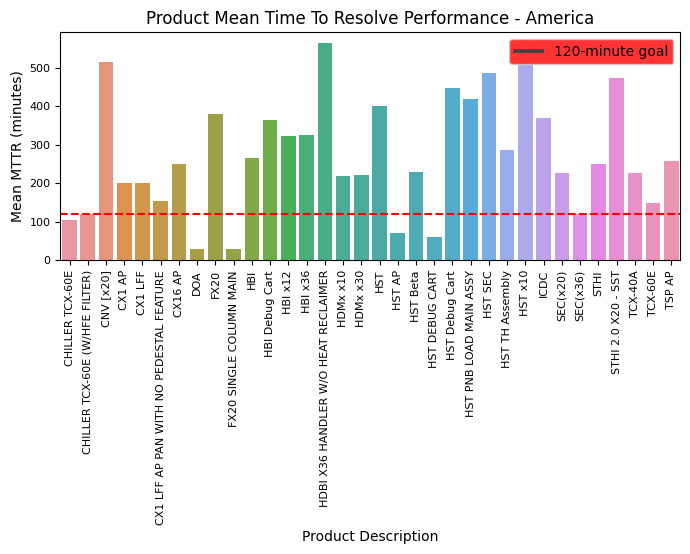

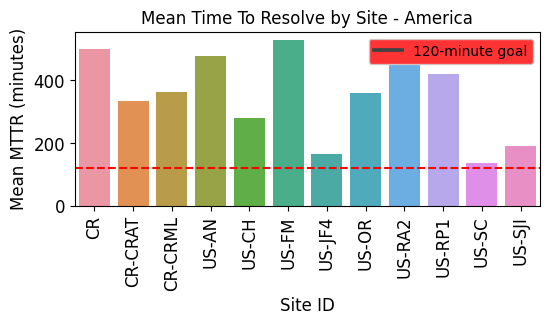

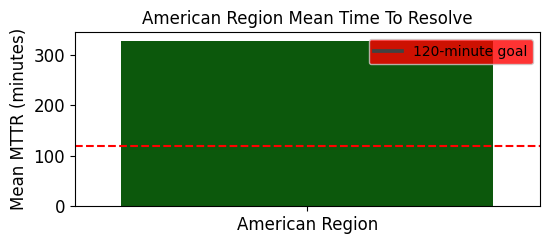

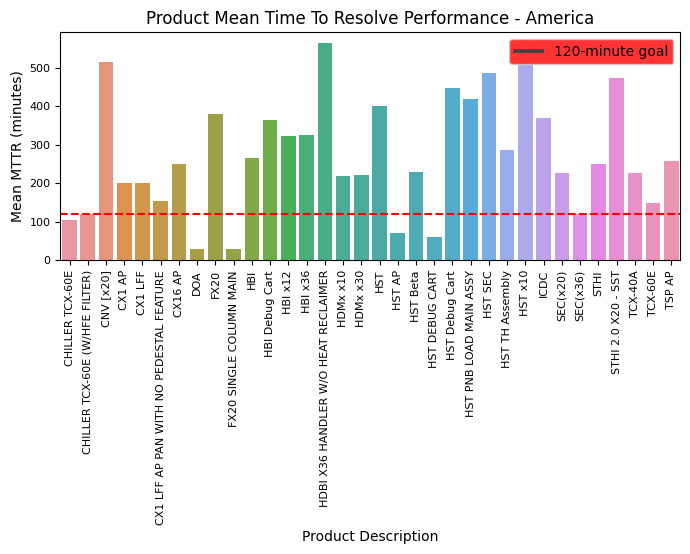

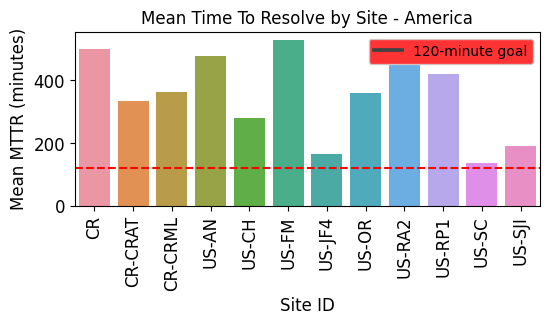

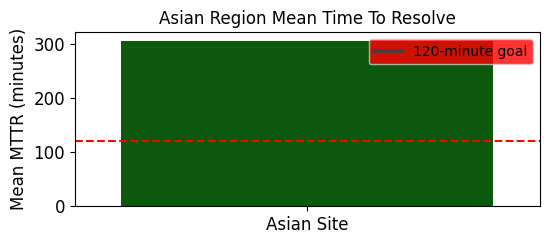

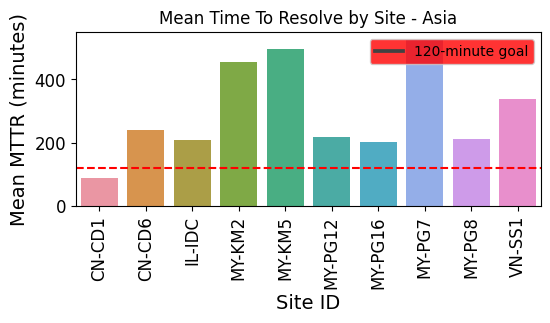

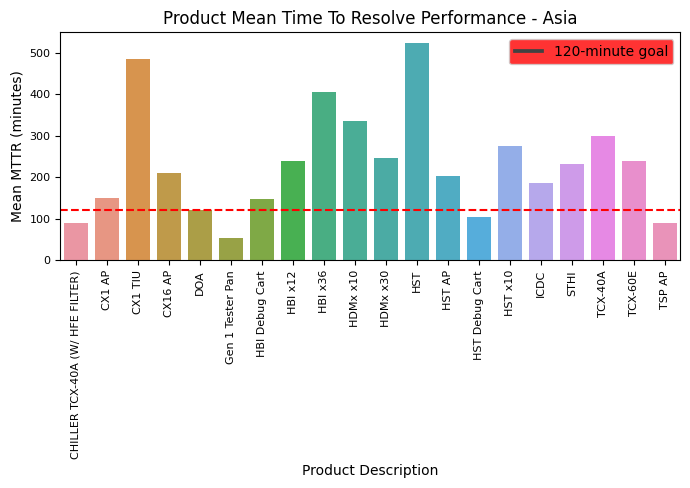

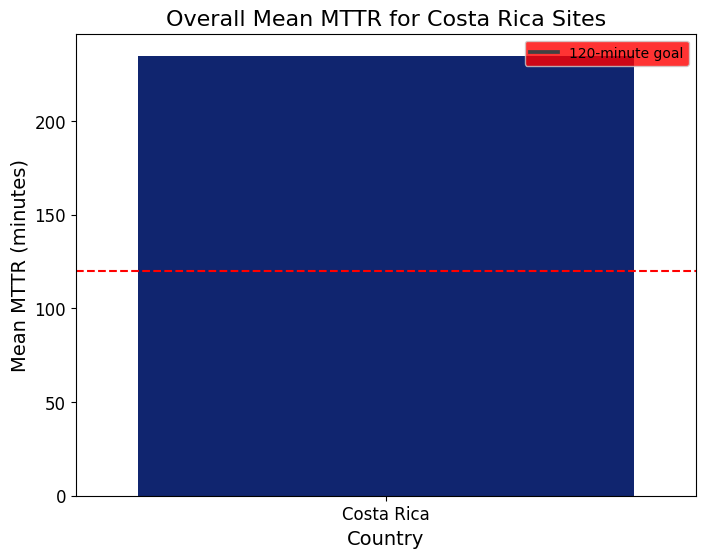

In [32]:
class MainWindow:
    def __init__(self, master, api_key, df2):  # Add df2 as a parameter
        self.master = master
        self.master.title("AEM Dashboard")
        master.configure(background='white')
        self.api_key = api_key

        # Creating frames
        self.main_frame = MainFrame(master, df2)  # Pass the df2 DataFrame to MainFrame
        self.america_frame = AmericaFrame(master,df2)
        self.asia_frame = AsiaFrame(master, df2)
        self.eu_frame = EUFrame(master)


        style = ttk.Style()
        style.configure("TButton", relief="flat", background="darkgrey", padding = 10, width = 20, height = 5, borderwidth = 0, font = ('Helvetica', 12, 'bold'), shape = 'rectangle')

        # Creating buttons
        self.button1 = ttk.Button(master, text='Global Operations', style='TButton', command=self.show_main_frame)
        self.button1.place(relx=0.94, rely=0.3, anchor="center")
        self.button2 = ttk.Button(master, text='America', style='TButton', command=self.show_america)
        self.button2.place(relx=0.94, rely=0.4, anchor="center")
        self.button3 = ttk.Button(master, text='Asia', style='TButton', command=self.show_asia)
        self.button3.place(relx=0.94, rely=0.5, anchor="center")
        self.button4 = ttk.Button(master, text='EU', style='TButton', command=self.show_eu)
        self.button4.place(relx=0.94, rely=0.6, anchor="center")

        self.main_frame.grid(row=0, column=1, sticky='nsew')


    def show_main_frame(self):
        self.main_frame.grid(row=0, column=1, sticky='nsew')
        self.america_frame.grid_forget()
        self.asia_frame.grid_forget()
        self.eu_frame.grid_forget()

    


        # Make the original buttons visible again
        self.button1.place(relx=0.94, rely=0.3, anchor="center")
        self.button2.place(relx=0.94, rely=0.4, anchor="center")
        self.button3.place(relx=0.94, rely=0.5, anchor="center")
        self.button4.place(relx=0.94, rely=0.6, anchor="center")


    def show_america(self):
        self.america_frame.grid(row=0, column=1, sticky='nsew')
        self.main_frame.grid_forget()
        self.asia_frame.grid_forget()
        self.eu_frame.grid_forget()

    def show_asia(self):
        self.asia_frame.grid(row=0, column=1, sticky='nsew')
        self.main_frame.grid_forget()
        self.america_frame.grid_forget()
        self.eu_frame.grid_forget()


    def show_eu(self):
        self.eu_frame.grid(row=0, column=1, sticky='nsew')
        self.main_frame.grid_forget()
        self.america_frame.grid_forget()
        self.asia_frame.grid_forget()

class MainFrame(ttk.Frame):
    def __init__(self, master, df2):
        ttk.Frame.__init__(self, master)

        # Create a PanedWindow
        self.paned_window = PanedWindow(self, orient='horizontal')
        self.paned_window.grid(row=0, column=0, sticky='nsew')

        # Create left and right frames
        self.left_frame = Frame(self.paned_window, bg='white')
        self.right_frame = Frame(self.paned_window, bg='white')

        # Add the frames to the PanedWindow
        self.paned_window.add(self.left_frame)
        self.paned_window.add(self.right_frame)

        self.df2 = df2
        self.create_globar_mttr_graph()
        self.create_site_mttr_graph()
        self.create_product_mttr_graph()

    def create_product_mttr_graph(self):
        global_filtered = self.df2.dropna(subset=['Site_ID'])
        global_filtered = global_filtered[global_filtered['Type'] == 'Issue Ticket']
        global_filtered['Duration'] = pd.to_timedelta(global_filtered['Duration'])
        global_filtered['Duration'] = global_filtered['Duration'].dt.total_seconds() / 60
        global_mttr_per_product = global_filtered.groupby('Product_Description')['Duration'].mean().reset_index()

        sns.set_palette("dark")

        fig, ax = plt.subplots(figsize=(8, 6))
        sns.barplot(data=global_mttr_per_product, x='Product_Description', y='Duration', ax=ax)
        ax.set_title('Product Mean Time To Resolve Performance', fontsize=12)
        ax.set_xlabel('Product Description', fontsize=10)
        ax.set_ylabel('Mean MTTR (minutes)', fontsize=10)
        ax.tick_params(labelsize=8)
        ax.axhline(y=120, color='r', linestyle='--')
        ax.legend(['120-minute goal'], loc='upper right', facecolor='red')
        plt.xticks(rotation=90)

        fig.subplots_adjust(bottom=0.5)

        canvas = FigureCanvasTkAgg(fig, master=self.right_frame)  # Changed to right frame
        canvas.draw()
        canvas.get_tk_widget().grid(row=2, column=0, sticky='nsew')


    def create_site_mttr_graph(self):
        global_filtered = self.df2.dropna(subset=['Site_ID'])
        global_filtered = global_filtered[global_filtered['Type'] == 'Issue Ticket']
        global_filtered['Duration'] = pd.to_timedelta(global_filtered['Duration'])
        global_filtered['Duration'] = global_filtered['Duration'].dt.total_seconds() / 60
        global_filtered['Site_ID'] = global_filtered['Site_ID'].replace('CR-CRTO', 'CR-CRAT')
        global_mttr_per_site = global_filtered.groupby('Site_ID')['Duration'].mean().reset_index()

        sns.set_palette("dark")

        fig, ax = plt.subplots(figsize=(6, 3))
        sns.barplot(data=global_mttr_per_site, x='Site_ID', y='Duration', ax=ax)
        ax.set_title('Mean Time To Resolve Analysis by Site', fontsize=12)
        ax.set_xlabel('Site ID', fontsize=10)
        ax.set_ylabel('Mean MTTR (minutes)', fontsize=10)
        ax.tick_params(labelsize=8)
        ax.axhline(y=120, color='r', linestyle='--')
        ax.legend(['120-minute goal'], loc='upper right', facecolor='red')
        plt.xticks(rotation=90)

        fig.subplots_adjust(bottom=0.4)

        canvas = FigureCanvasTkAgg(fig, master=self.left_frame)  # Changed to left frame
        canvas.draw()
        canvas.get_tk_widget().grid(row=2, column=0, rowspan=2, sticky='nsew')
        

    def create_globar_mttr_graph(self):
        df_filtered = self.df2[~self.df2['Type'].str.contains('SQ Ticket')].copy()
        df_filtered['Duration'] = pd.to_timedelta(df_filtered['Duration'])
        df_filtered['Duration'] = df_filtered['Duration'].dt.total_seconds() / 60
        global_mttr = df_filtered['Duration'].mean()

        sns.set_palette("dark")

        fig, ax = plt.subplots(figsize=(6, 3))
        sns.barplot(x=['Global MTTR'], y=[global_mttr], ax=ax, color='darkgreen')
        ax.set_title('Global Mean Time To Resolve', fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('Mean MTTR (minutes)', fontsize=10)
        ax.tick_params(labelsize=8)
        ax.axhline(y=120, color='r', linestyle='--')

        fig.subplots_adjust(bottom=0.3)

        canvas = FigureCanvasTkAgg(fig, master=self.left_frame)  # Changed to left frame
        canvas.draw()
        canvas.get_tk_widget().grid(row=0, column=0, sticky='nsew')



class AmericaFrame(Frame):
    def __init__(self, master, df2):
        super().__init__(master)
        self.configure(bg='white')
        self.df2 = df2

        # Create a PanedWindow
        self.paned_window = PanedWindow(self, orient='horizontal')
        self.paned_window.grid(row=1, column=0, sticky='nsew')

        # Create left and right frames
        self.left_frame = Frame(self.paned_window, bg='white')
        self.right_frame = Frame(self.paned_window, bg='white')

        # Add the frames to the PanedWindow
        self.paned_window.add(self.left_frame)
        self.paned_window.add(self.right_frame)

        self.create_america_mttr_graph()
        self.create_america_mttr_per_product_graph()
        self.create_america_mttr_per_site_graph()

        # Create buttons frame
        self.buttons_frame = Frame(self, bg='white')
        self.buttons_frame.grid(row=2, column=0, columnspan=2, sticky='s')

        # Create buttons
        self.costa_rica_button = ttk.Button(self.buttons_frame, text='Costa Rica', command=self.show_costa_rica_graph)
        self.us_labs_button = ttk.Button(self.buttons_frame, text='US Labs', command=self.show_us_labs_graph)
        self.chandler_button = ttk.Button(self.buttons_frame, text='Chandler', command=self.show_chandler_graph)
        

        # Add buttons to the frame
        self.costa_rica_button.grid(row=2, column=0, padx=10, pady=50)
        self.us_labs_button.grid(row=2, column=1, padx=10, pady=50)
        self.chandler_button.grid(row=2, column=2, padx=10, pady=50)

        # Hide buttons by default
        self.buttons_frame.grid_remove()

        self.show_buttons()

        # Create America MTTR graphs
        self.create_america_mttr_graph()
        self.create_america_mttr_per_product_graph()
        self.create_america_mttr_per_site_graph()

    def show_buttons(self):
        # Show buttons
        self.buttons_frame.grid()

    def hide_buttons(self):
        # Hide buttons
        self.buttons_frame.grid_remove()

    def show_costa_rica_graph(self):
        # Remove all existing widgets from the AmericaFrame
        for widget in self.winfo_children():
            widget.destroy()
        
        # Create a new Figure and Axes object
        fig, ax = plt.subplots(figsize=(8,6))
        
        # Filter the dataframe to only include Costa Rica sites
        cr_filtered = df2.dropna(subset=['Site_ID'])
        cr_filtered = cr_filtered[cr_filtered['Site_ID'].str.startswith('CR')]

        # Filter for Issue Tickets only
        cr_filtered = cr_filtered[cr_filtered['Type'] == 'Issue Ticket']

        # Convert Duration to timedelta format
        cr_filtered['Duration'] = pd.to_timedelta(cr_filtered['Duration'])

        # Convert Duration to minutes
        cr_filtered['Duration'] = cr_filtered['Duration'].dt.total_seconds() / 60

        # Calculate the mean MTTR for Costa Rica sites
        cr_mttr = cr_filtered['Duration'].mean()

        # Use seaborn colorblind color palette
        sns.set_palette("dark")

        # Create a bar plot of the overall mean MTTR for Costa Rica sites
        sns.barplot(ax=ax, x=['Costa Rica'], y=[cr_mttr])
        ax.set_title('Overall Mean MTTR for Costa Rica Sites', fontsize=16)
        ax.set_xlabel('Country', fontsize=14)
        ax.set_ylabel('Mean MTTR (minutes)', fontsize=14)
        ax.tick_params(labelsize=12)

        # Add red dotted line at 120-minute goal
        ax.axhline(y=120, color='r', linestyle='--')
        # Change legend color to red
        ax.legend(['120-minute goal'], loc='upper right', facecolor='red')

        # Update the canvas
        self.canvas = FigureCanvasTkAgg(fig, master=self)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        self.forget_costa_rica_button = ttk.Button(self.costa_rica_frame, text='Back to America', command=self.forget_costa_rica_graph)
        self.forget_costa_rica_button.pack(pady=10)


    def forget_costa_rica_graph(self):
        # Destroy the Costa Rica frame
        self.costa_rica_frame.destroy()

        # Re-show the America frame
        self.america_frame.pack(fill='both', expand=True)



    def hide_america_mttr_graphs(self):
        # Hide the America MTTR graphs
        self.left_frame.winfo_children()[0].grid_remove()
        self.left_frame.winfo_children()[1].grid_remove()
        self.right_frame.winfo_children()[0].grid_remove()


    def show_us_labs_graph(self):
        # Code to show US Labs graph
        pass

    def show_chandler_graph(self):
        # Code to show Chandler graph
        pass

    def create_america_mttr_graph(self):
        # Filter the dataframe to only include non-null Site_ID values
        global_filtered = self.df2.dropna(subset=['Site_ID'])

        # Filter for America Site (CR and US sites)
        global_filtered = global_filtered[global_filtered['Site_ID'].str.startswith(('CR', 'US'))]

        # Convert Duration to timedelta format
        global_filtered['Duration'] = pd.to_timedelta(global_filtered['Duration'])

        # Convert Duration to minutes
        global_filtered['Duration'] = global_filtered['Duration'].dt.total_seconds() / 60

        # Calculate the mean MTTR for America Site
        america_mttr = global_filtered['Duration'].mean()

        # Use seaborn colorblind color palette
        sns.set_palette("dark")

        # Create a bar plot of the overall mean MTTR for America Site
        fig, ax = plt.subplots(figsize=(6, 3))
        sns.barplot(x=['American Region'], y=[america_mttr], ax=ax, color='darkgreen')
        ax.set_title('American Region Mean Time To Resolve', fontsize=12)
        ax.set_ylabel('Mean MTTR (minutes)', fontsize=12)
        ax.tick_params(labelsize=12)
        fig.subplots_adjust(bottom=0.3)

        # Add red dotted line at 120-minute goal
        ax.axhline(y=120, color='r', linestyle='--')
        # Change legend color to red
        ax.legend(['120-minute goal'], loc='upper right', facecolor='red')

        canvas = FigureCanvasTkAgg(fig, master=self.left_frame)  # Changed to left frame
        canvas.draw()
        canvas.get_tk_widget().grid(row=0, column=0, sticky='nsew')

    def create_america_mttr_per_product_graph(self):
        # Filter the dataframe to only include non-null Site_ID values
        global_filtered = self.df2.dropna(subset=['Site_ID'])

        # Filter for America Site (CR and US sites)
        global_filtered = global_filtered[global_filtered['Site_ID'].str.startswith(('CR', 'US'))]

        # Convert Duration to timedelta format
        global_filtered['Duration'] = pd.to_timedelta(global_filtered['Duration'])

        # Convert Duration to minutes
        global_filtered['Duration'] = global_filtered['Duration'].dt.total_seconds() / 60

        # Group by Product_Description and calculate the mean MTTR for each product in America Site
        america_mttr_per_product = global_filtered.groupby('Product_Description')['Duration'].mean().reset_index()

        sns.set_palette("dark")

        fig, ax = plt.subplots(figsize=(8, 6))
        sns.barplot(data=america_mttr_per_product, x='Product_Description', y='Duration', ax=ax)
        ax.set_title('Product Mean Time To Resolve Performance - America', fontsize=12)
        ax.set_xlabel('Product Description', fontsize=10)
        ax.set_ylabel('Mean MTTR (minutes)', fontsize=10)
        ax.tick_params(labelsize=8)
        ax.axhline(y=120, color='r', linestyle='--')
        ax.legend(['120-minute goal'], loc='upper right', facecolor='red')
        plt.xticks(rotation=90)

        fig.subplots_adjust(bottom=0.5)

        canvas = FigureCanvasTkAgg(fig, master=self.right_frame)  # Changed to right frame
        canvas.draw()
        canvas.get_tk_widget().grid(row=2, column=0, sticky='nsew')


    def create_america_mttr_per_site_graph(self):
        # Filter the dataframe to only include non-null Site_ID values
        global_filtered = self.df2.dropna(subset=['Site_ID'])

        # Filter for America Site (CR and US sites)
        global_filtered = global_filtered[global_filtered['Site_ID'].str.startswith(('CR', 'US'))]

        # Convert Duration to timedelta format
        global_filtered['Duration'] = pd.to_timedelta(global_filtered['Duration'])

        # Convert Duration to minutes
        global_filtered['Duration'] = global_filtered['Duration'].dt.total_seconds() / 60

        # Replace 'CR-CRTO' with 'CR-CRAT' in the Site_ID column
        global_filtered['Site_ID'] = global_filtered['Site_ID'].replace('CR-CRTO', 'CR-CRAT')

        # Group by Site_ID and calculate the mean MTTR for each site in America Site
        america_mttr_per_site = global_filtered.groupby('Site_ID')['Duration'].mean().reset_index()

        # Use seaborn colorblind color palette
        sns.set_palette("dark")

        # Create a bar plot of the overall mean MTTR for each Site_ID in America Site
        fig, ax = plt.subplots(figsize=(6, 3))
        sns.barplot(data=america_mttr_per_site, x='Site_ID', y='Duration', ax=ax)
        ax.set_title('Mean Time To Resolve by Site - America', fontsize=12)
        ax.set_xlabel('Site ID', fontsize=12)
        ax.set_ylabel('Mean MTTR (minutes)', fontsize=12)
        ax.tick_params(labelsize=12)

        # Add red dotted line at 120-minute goal
        ax.axhline(y=120, color='r', linestyle='--')
        # Change legend color to red
        ax.legend(['120-minute goal'], loc='upper right', facecolor='red')

        # Rotate x-axis labels for better readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

        fig.subplots_adjust(bottom=0.3)

        canvas = FigureCanvasTkAgg(fig, master=self.left_frame)  # Changed to left frame
        canvas.draw()
        canvas.get_tk_widget().grid(row=2, column=0, rowspan=2, sticky='nsew')






class AsiaFrame(Frame):
    def __init__(self, master, df2):
        super().__init__(master)
        self.configure(bg='white')
        self.df2 = df2

        style = ttk.Style()
        style.configure("Graph.TButton", relief="groove", background="green", borderwidth=10)
        style.configure("CR.TButton", relief="flat", background="darkgrey", padding=10, width=20, height=5, borderwidth=0, font=('Helvetica', 12, 'bold'), shape='rectangle')

            # Create a PanedWindow
        self.paned_window = PanedWindow(self, orient='horizontal')
        self.paned_window.grid(row=1, column=0, sticky='nsew')

        # Create left and right frames
        self.left_frame = Frame(self.paned_window, bg='white')
        self.right_frame = Frame(self.paned_window, bg='white')

        # Add the frames to the PanedWindow
        self.paned_window.add(self.left_frame)
        self.paned_window.add(self.right_frame)

        self.create_asia_mttr_graph()
        self.create_asia_mttr_per_site_graph()
        self.create_asia_mttr_per_product_graph()

    def create_asia_mttr_graph(self):
        # Filter the dataframe to only include Asian Site_ID values
        asian_filtered = self.df2.dropna(subset=['Site_ID'])
        asian_filtered = asian_filtered[~asian_filtered['Site_ID'].str.startswith(('CR', 'US'))]
        asian_filtered = asian_filtered[asian_filtered['Type'] == 'Issue Ticket']

        # Convert Duration to timedelta format
        asian_filtered['Duration'] = pd.to_timedelta(asian_filtered['Duration'])

        # Convert Duration to minutes
        asian_filtered['Duration'] = asian_filtered['Duration'].dt.total_seconds() / 60

        # Calculate the mean MTTR for Asian Site
        asian_mttr = asian_filtered['Duration'].mean()

        # Use seaborn colorblind color palette
        sns.set_palette("dark")

        # Create a bar plot of the overall mean MTTR for Asian Site
        fig, ax = plt.subplots(figsize=(6, 3))
        sns.barplot(x=['Asian Site'], y=[asian_mttr], ax=ax, color='darkgreen')
        ax.set_title('Asian Region Mean Time To Resolve', fontsize=12)
        ax.set_ylabel('Mean MTTR (minutes)', fontsize=12)
        ax.tick_params(labelsize=12)
        fig.subplots_adjust(bottom=0.3)

        # Add red dotted line at 120-minute goal
        ax.axhline(y=120, color='r', linestyle='--')
        # Change legend color to red
        ax.legend(['120-minute goal'], loc='upper right', facecolor='red')

        canvas = FigureCanvasTkAgg(fig, master=self.left_frame)  # Changed to left frame
        canvas.draw()
        canvas.get_tk_widget().grid(row=0, column=0, sticky='nsew')


    def create_asia_mttr_per_site_graph(self):
        # Filter the dataframe to only include Asian Site_ID values
        asian_filtered = self.df2.dropna(subset=['Site_ID'])
        asian_filtered = asian_filtered[~asian_filtered['Site_ID'].str.startswith(('CR', 'US'))]
        asian_filtered = asian_filtered[asian_filtered['Type'] == 'Issue Ticket']

        # Convert Duration to timedelta format
        asian_filtered['Duration'] = pd.to_timedelta(asian_filtered['Duration'])

        # Convert Duration to minutes
        asian_filtered['Duration'] = asian_filtered['Duration'].dt.total_seconds() / 60

        # Group by Site_ID and calculate the mean MTTR for each site in Asian Site
        asian_mttr_per_site = asian_filtered.groupby('Site_ID')['Duration'].mean().reset_index()

        # Define custom color palette
        custom_palette = sns.color_palette(["#FFC5D9", "#FFA5B4", "#FF85A0", "#FF658C", "#FF436D", "#FF2153", "#E8004F"])

        # Use custom color palette
        sns.set_palette(custom_palette)

        # Create a bar plot of the overall mean MTTR for each Site_ID in Asian Site
        fig, ax = plt.subplots(figsize=(6, 3))
        sns.barplot(data=asian_mttr_per_site, x='Site_ID', y='Duration', ax=ax)
        ax.set_title('Mean Time To Resolve by Site - Asia', fontsize=12)
        ax.set_xlabel('Site ID', fontsize=14)
        ax.set_ylabel('Mean MTTR (minutes)', fontsize=14)
        ax.tick_params(labelsize=12)

        # Add red dotted line at 120-minute goal
        ax.axhline(y=120, color='r', linestyle='--')

        # Change legend color to red
        ax.legend(['120-minute goal'], loc='upper right', facecolor='red')

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=90)

        fig.subplots_adjust(bottom=0.3)

        canvas = FigureCanvasTkAgg(fig, master=self.left_frame)  # Changed to left frame
        canvas.draw()
        canvas.get_tk_widget().grid(row=2, column=0, rowspan=2, sticky='nsew')



    def create_asia_mttr_per_product_graph(self):
        # Filter the dataframe to only include Asian Site_ID values
        asian_filtered = self.df2.dropna(subset=['Site_ID'])
        asian_filtered = asian_filtered[~asian_filtered['Site_ID'].str.startswith(('CR', 'US'))]
        asian_filtered = asian_filtered[asian_filtered['Type'] == 'Issue Ticket']

        # Convert Duration to timedelta format
        asian_filtered['Duration'] = pd.to_timedelta(asian_filtered['Duration'])

        # Convert Duration to minutes
        asian_filtered['Duration'] = asian_filtered['Duration'].dt.total_seconds() / 60

        # Group by Product_Description and calculate the mean MTTR for each product in Asian Site
        asian_mttr_per_product = asian_filtered.groupby('Product_Description')['Duration'].mean().reset_index()

        # Use seaborn colorblind color palette
        sns.set_palette("colorblind")

        fig, ax = plt.subplots(figsize=(8, 6))
        sns.barplot(data=asian_mttr_per_product, x='Product_Description', y='Duration', ax=ax)
        ax.set_title('Product Mean Time To Resolve Performance - Asia', fontsize=12)
        ax.set_xlabel('Product Description', fontsize=10)
        ax.set_ylabel('Mean MTTR (minutes)', fontsize=10)
        ax.tick_params(labelsize=8)
        ax.axhline(y=120, color='r', linestyle='--')
        ax.legend(['120-minute goal'], loc='upper right', facecolor='red')
        plt.xticks(rotation=90)

        fig.subplots_adjust(bottom=0.5)

        canvas = FigureCanvasTkAgg(fig, master=self.right_frame)  # Changed to right frame
        canvas.draw()
        canvas.get_tk_widget().grid(row=2, column=0, sticky='nsew')



class EUFrame(Frame):
    def __init__(self, master):
        super().__init__(master)
        self.configure(bg='white')
        label = Label(self, text = 'EU', bg = 'white', font = ('Segoe UI', 20, 'bold'))
        label.grid()

root = tk.Tk()
api_key = 'GHwvGA29rHRE418p3YNLSUTEw6D43rSW6neIm'
app = MainWindow(root, api_key, df2)
root.mainloop()


